Using Breast Cancer Wisconsin (Diagnostic) Dataset to build and evaluate a predictive model for breast cancer diagnosis. The main focus will be on understanding the model's performance using the Lift Chart and other evaluation metrics.

In [61]:
# Import necessary library
import numpy as np
import pandas as pd

import missingno as mno
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics



# Task 1
Data Exploration: Start by exploring the Breast Cancer Wisconsin (Diagnostic) Dataset. Check for missing values, class distribution, and feature characteristics. Split the dataset into training and testing sets.

In [62]:
# Load data from sklearn and check the information of the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Check the data information

print("The information of breast cancer Wisconsin data")
print(data.keys())
print(data['DESCR'])

The information of breast cancer Wisconsin data
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of t

In [63]:
# Put the "data" into the dataframe as the features while the target(diagnosis) as target "y"
df = pd.DataFrame(data['data'],columns=data['feature_names'])
y = pd.DataFrame(data['target'])
y.columns =["diagnosis"]

#Check the shape and feature types
display(df.head())
print("____________________________________________________")
print("The shape of the breast cancer feature dataset")
display(df.shape)

print("The feature types of the breast cancer feature dataset")
display(df.info())

print("____________________________________________________")
print("The shape of the breast cancer target dataset")
display(y.shape)

print("____________________________________________________")
print("The shape of the breast cancer target dataset")
display(y.info())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


____________________________________________________
The shape of the breast cancer feature dataset


(569, 30)

The feature types of the breast cancer feature dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               

None

____________________________________________________
The shape of the breast cancer target dataset


(569, 1)

____________________________________________________
The shape of the breast cancer target dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   diagnosis  569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


None

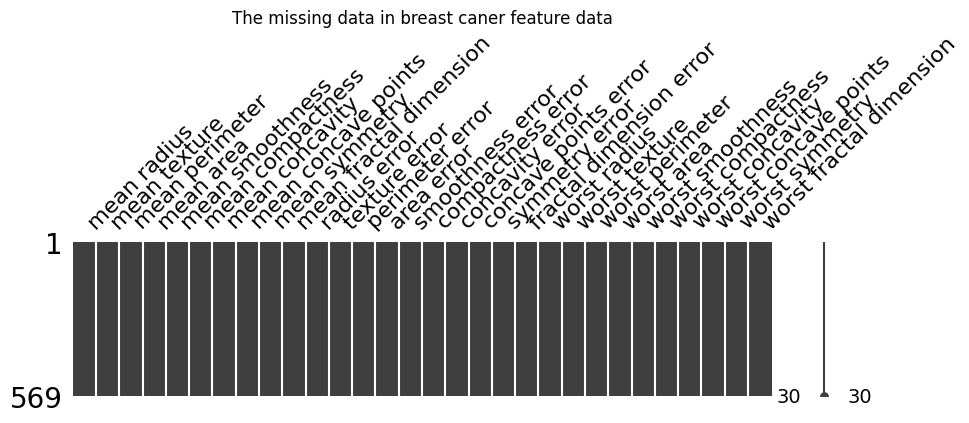

The summary of missing value in y


diagnosis    0
dtype: int64

In [64]:
# 1- 1 Check the missing values of data
#Check the missing values in feature dataset
mno.matrix(df, figsize = (10, 2))
plt.title("The missing data in breast caner feature data")
plt.show()

#Check the missing values in target dataset "y"
print("The summary of missing value in y")
y.isnull().sum()

Based on the missing value matrix, we observe that there are no "white" spaces, indicating the absence of any missing values. Additionally, when we examine the output of "df.info()", it confirms that there are no "non-null" values in any of the columns of the data frame. And there is no missing value in the target "y" dataset.

In [65]:
# Explore the class distribution of the feature dataset
# First we can use skew to look at the feature distribution
print("The skew results for each column:")
display(df.skew())

The skew results for each column:


mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

The skewness result indicates whether the data is positively (right) or negatively (left) skewed. Values closer to zero indicate less skewness. From the skewness analysis, we can observe that features like "area," "fractal dimension," and "concavity" exhibit significant discriminatory patterns, both in terms of mean and worst values. These findings may have implications in the predictive analysis of the dataset.

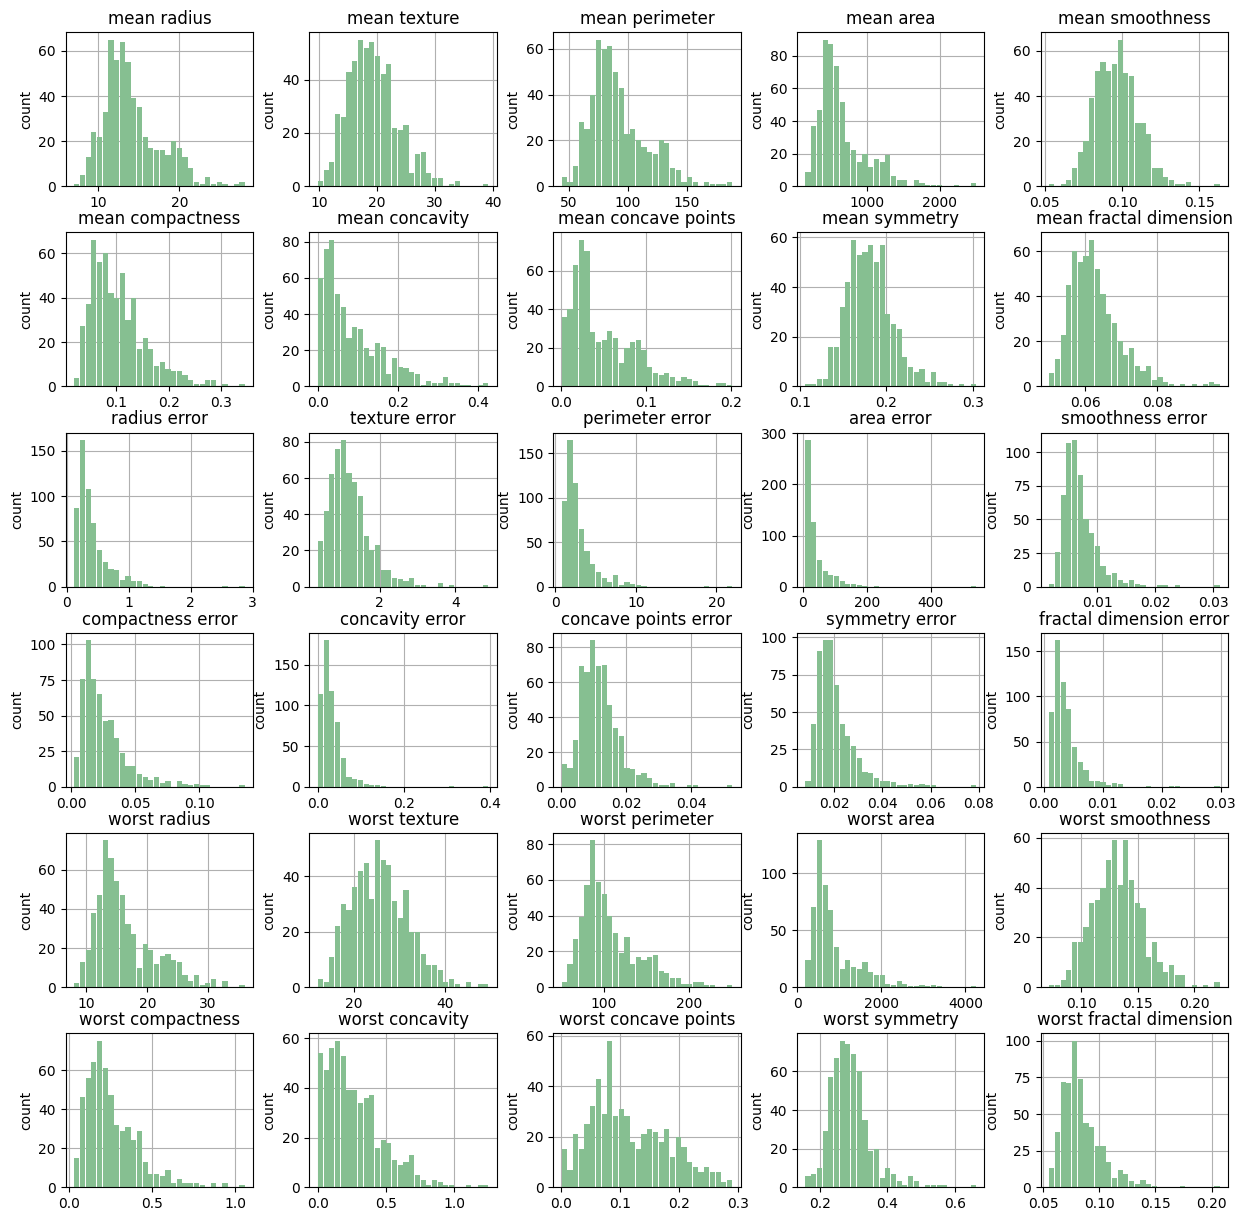

In [66]:
# We can also visualize the distribution using a histogram, which provides a graphical representation of the data's frequency distributio
axes = df.hist(bins=30,figsize=(15,15), color='#86bf91', zorder=2, rwidth=0.9)
for ax in axes.flatten():
    ax.set_ylabel("count")

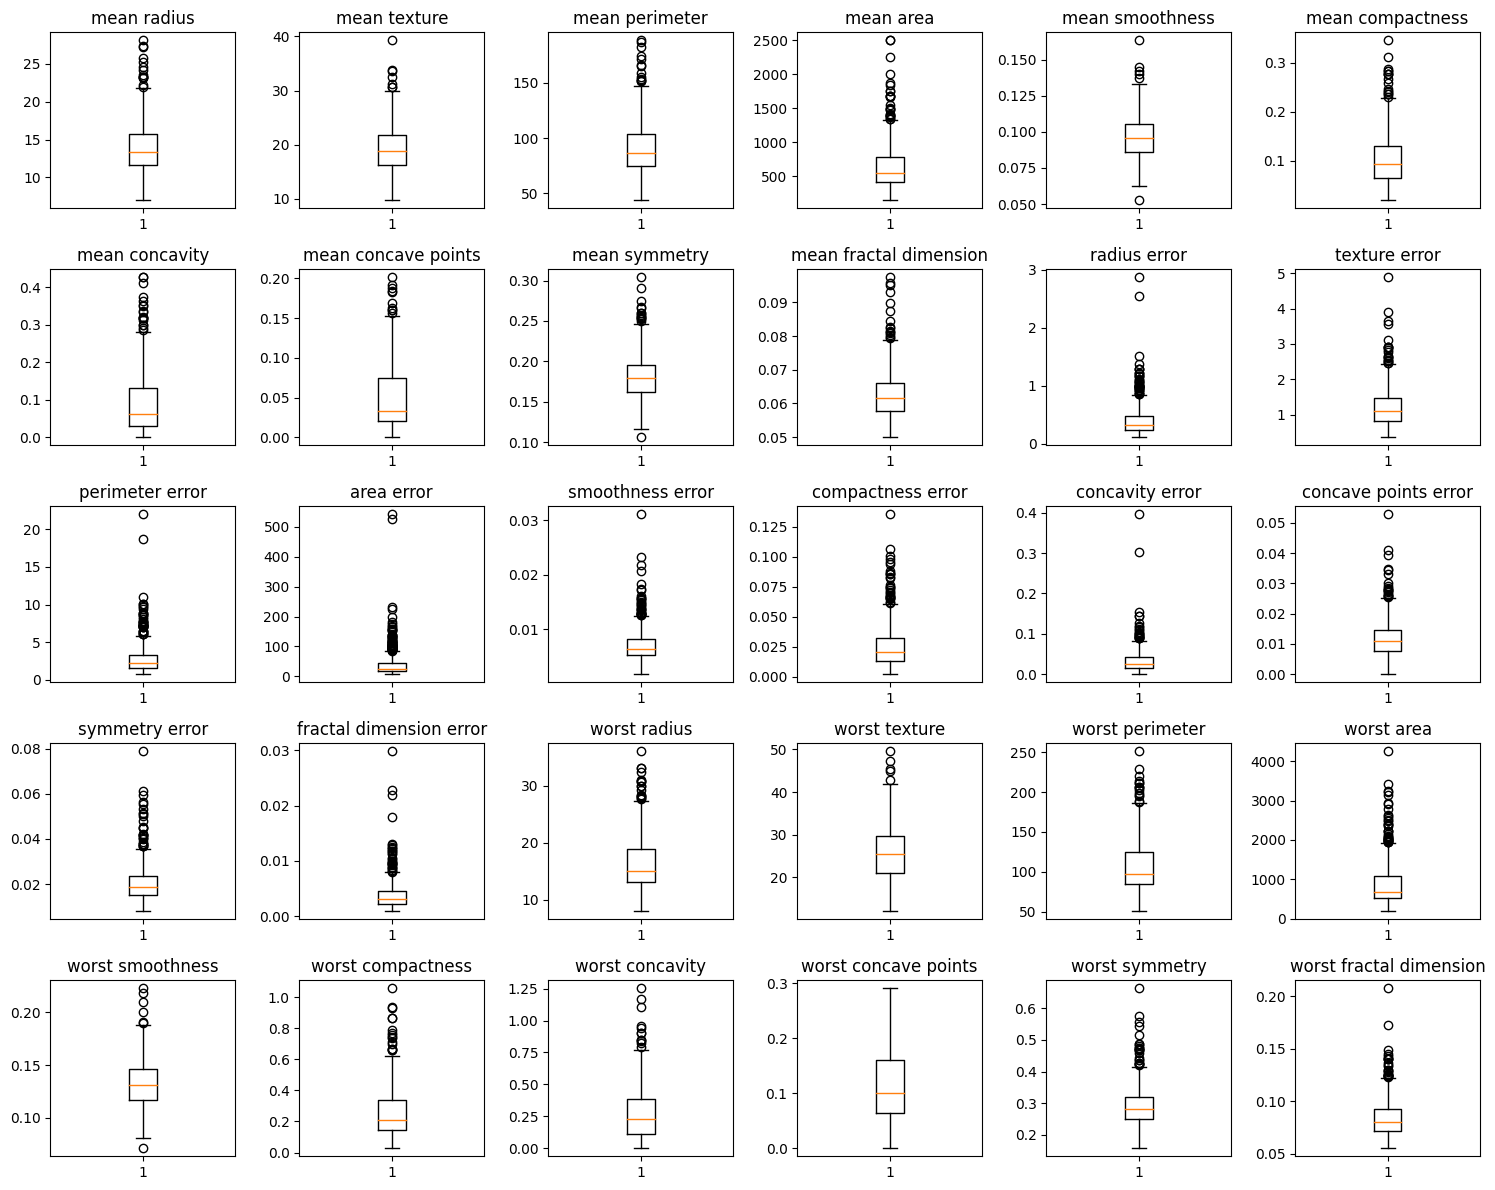

In [67]:
# Then we use the boxplot to plot the data. We can find out the distribution as well as the outliers

plt.figure(figsize=(15, 12))

# Iterate through each column and plot it in the grid
for i, column in enumerate(df.columns):
    plt.subplot(5, 6, i+1)
    plt.boxplot(df[column])
    plt.title(column)

# Adjust the layout and padding of the subplots
plt.tight_layout()
# Plot show
plt.show()

From the histogram and box plots, we can find out that the data distribution for most of the columns is skewed, and numerous outliers are present in the dataset.

In [68]:
#The distribution of y
print(y.groupby("diagnosis").size())

diagnosis
0    212
1    357
dtype: int64


Given that 212 are Malignant and 357 are Benign, we can know that "0" indicates Malignant and "1" indicates Benign.

In [69]:
# Explore the feature characteristics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [70]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split (df, y, test_size = 0.20, random_state=42)

# Check the shape of training and testing data
display(X_train.shape)
display(X_test.shape)

(455, 30)

(114, 30)

# Task 2
Model Building: Choose a suitable classification model (e.g., Logistic Regression, Decision Tree, Random Forest, etc.). Train the model on the training data and make predictions on the testing data.

<Axes: >

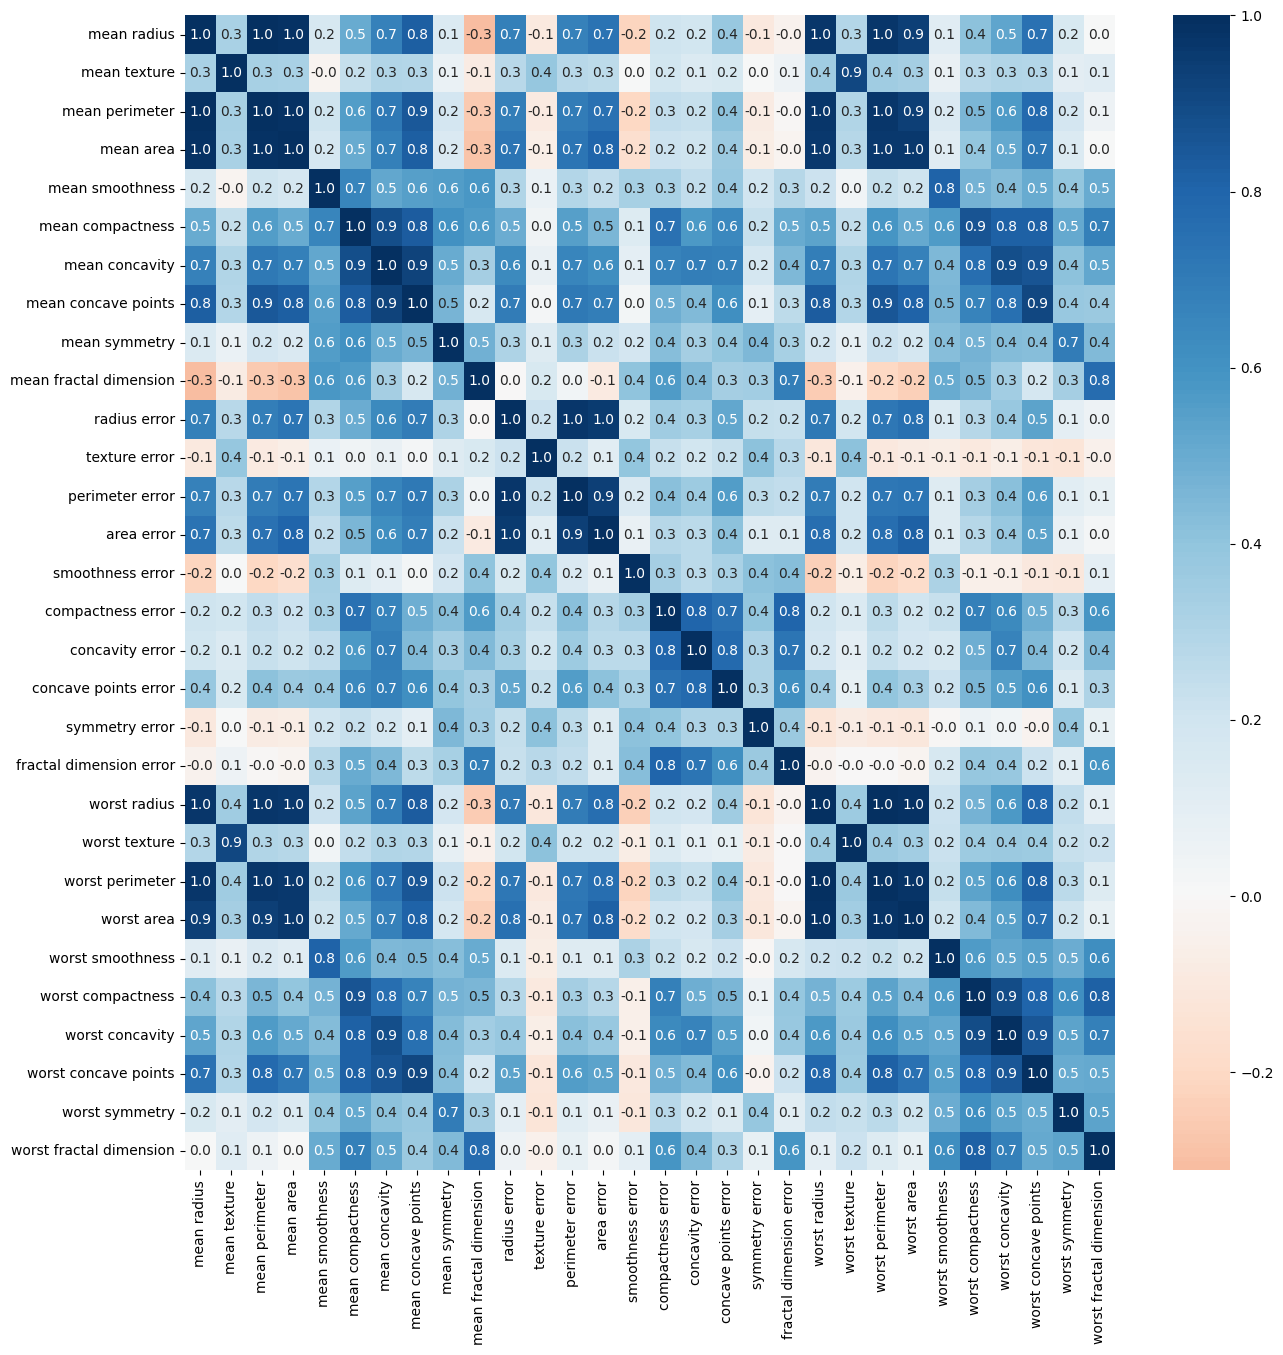

In [71]:
# First, calculate the paired coefficiency and determine the features used in the future clustering
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0,ax=ax)

From the correlation table heatmap, we can observe that certain variables exhibit strong correlation, as indicated by darker values on the heatmap. This suggests that there might be redundant information among these variables, which can be addressed by employing dimension reduction methods. By reducing the number of variables, we aim to retain the most relevant information while minimizing multicollinearity and enhancing the model's interpretability and performance.

In [72]:
# Dimention reduction
# To gain insights into the interrelationships between variables, we have examined the correlation between them.
# In order to reduce the dimensionality of the dataset while preserving the most important information, we will employ Principal Component Analysis (PCA).
# 1. Standardize the data of the features
scaler=StandardScaler()
scaler.fit(df)
scaled_data =scaler.transform(df)
display(scaled_data)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [73]:
## Use the PCA tech to fit the data. I will try to seethe expanied variance of all components decomposition of the 30 features then deternmin the number of principal components.
pca =PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#Check the column number before and after PCA
print("The shape of data before PCA")
display(scaled_data.shape)

print("-----------------------------------")
print("The shape of data after PCA")
display(x_pca.shape)

The shape of data before PCA


(569, 30)

-----------------------------------
The shape of data after PCA


(569, 30)

In [74]:
# View the explanied variance to justify the results
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_), 'Proportion of variance': pca.explained_variance_ratio_, 'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary_df.columns) + 1)]
display(pcaSummary_df.round(4))
print('The cumulative explained variation ratio for the breast cancer data is : {}'.format(np.cumsum(pca.explained_variance_ratio_)))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Standard deviation,3.6476,2.3878,1.6802,1.4086,1.2852,1.0998,0.8224,0.6910,0.6462,0.5927,...,0.1733,0.1658,0.1562,0.1345,0.1245,0.0905,0.0831,0.0399,0.0274,0.0115
Proportion of variance,0.4427,0.1897,0.0939,0.0660,0.0550,0.0402,0.0225,0.0159,0.0139,0.0117,...,0.0010,0.0009,0.0008,0.0006,0.0005,0.0003,0.0002,0.0001,0.0000,0.0000
Cumulative proportion,0.4427,0.6324,0.7264,0.7924,0.8473,0.8876,0.9101,0.9260,0.9399,0.9516,...,0.9966,0.9975,0.9983,0.9989,0.9994,0.9997,0.9999,1.0000,1.0000,1.0000


The cumulative explained variation ratio for the breast cancer data is : [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


Based on the PCA explained variation and the cumulative explained variation ratio, the first ten components account for approximately 95.16% of the total variation in the 30 variables. This indicates that these ten components capture a significant portion of the original data's variability. As a result, we can use these first ten components for the later classification analysis.

In [75]:
# Create a new dataframe containing the first ten components
# Get the first ten pca data
ten_pca = x_pca[0:10]
display(ten_pca.shape)
# Transform rows of ten_pca data become the columns of ten_pca.T. The transpose allows work with the principal components as columns rather than rows.
ten_pca.T
display(ten_pca.T.shape)

# Performs matrix multiplication between the original DataFrame df containing the 30 variables (columns) and the first ten principal components (ten_pca.T).
# The result is a new DataFrame which contains the reduced components.

transformed_df = np.dot(df,ten_pca.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
new_df['diagnosis'] = y.values
new_df.describe()

(10, 30)

(30, 10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2273.404697,599.093549,692.355375,203.368831,2058.891768,459.641494,-167.288812,-37.337607,-642.320295,-2187.258529,0.627417
std,1169.903930,358.415643,381.495519,92.141991,1061.408092,277.671012,44.833657,22.289739,316.167771,1139.514198,0.483918
min,528.475520,65.815291,148.571677,59.138084,484.150678,76.329967,-443.938839,-245.883648,-2224.037666,-8388.565997,0.000000
25%,1484.405937,356.969582,440.488163,140.586002,1346.893070,274.980162,-187.163037,-47.357117,-775.186786,-2607.416215,0.000000
50%,1928.115722,497.262600,577.414316,175.187086,1752.969112,371.899696,-152.627211,-35.520253,-553.407255,-1848.116255,1.000000
75%,2666.098840,738.764631,841.482515,250.611290,2449.357516,549.662658,-136.616684,-24.751668,-427.642624,-1425.426756,1.000000
max,8384.486714,2314.005317,2734.791706,645.499427,7421.127206,1992.704907,-93.881754,69.481206,-156.367795,-496.065162,1.000000


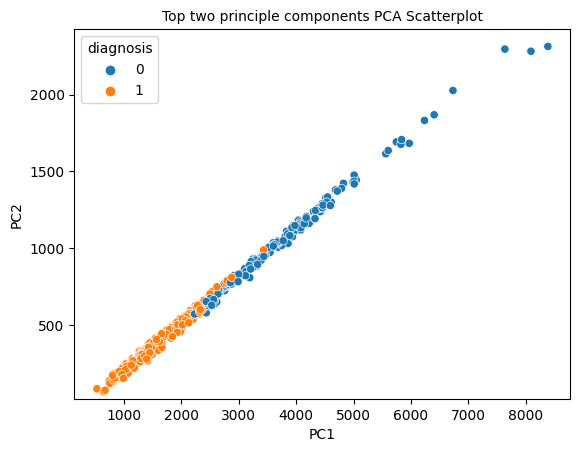

In [76]:
# We can plot the first two components via the diagnosis
sns.scatterplot(data= new_df,
                 x=new_df['PC1'],
                 y=new_df['PC2'],
               hue=new_df['diagnosis'])
plt.title('Top two principle components PCA Scatterplot', fontsize=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(20)
plt.show()


In [77]:
# Splitting the data into training and testing data
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(new_df.iloc[:,:10], new_df["diagnosis"], test_size=0.2, random_state=42)

# Check the shape of the train and test data
display(X_pca_train.shape)
display(X_pca_test.shape)

(455, 10)

(114, 10)

In [78]:
# Create and train by using the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_pca_train, y_pca_train)

# Make predictions by using the test data
preditions = model.predict(X_pca_test)

# Task 3
Model Evaluation: Calculate the following evaluation metrics for the model:

Accuracy: How many predictions are correct overall?
Precision: How many of the predicted Malignant cases are truly Malignant?
Recall: How many of the actual Malignant cases are correctly predicted?
F1 Score: The harmonic mean of precision and recall.
ROC Curve: Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC).

In [79]:
# Evaluate the predictive model's performance using accuracy evaluation method
accuracy = accuracy_score(y_pca_test,preditions)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.974


In [80]:
# Evaluate the predictive model's performance using precision evaluation method
precision = precision_score(y_pca_test,preditions)
print(f"Presicion: {precision:.3f}")

Presicion: 0.972


In [81]:
# Evaluate the predictive model's performance using recall evaluation method
recall = recall_score(y_pca_test, preditions)
print(f"Recall: {recall:.3f}")

Recall: 0.986


In [82]:
# Evaluate the predictive model's performance using F1_score evaluation method
f1 = f1_score(y_pca_test,preditions)
print(f"F1_score: {f1:.3f}")

F1_score: 0.979


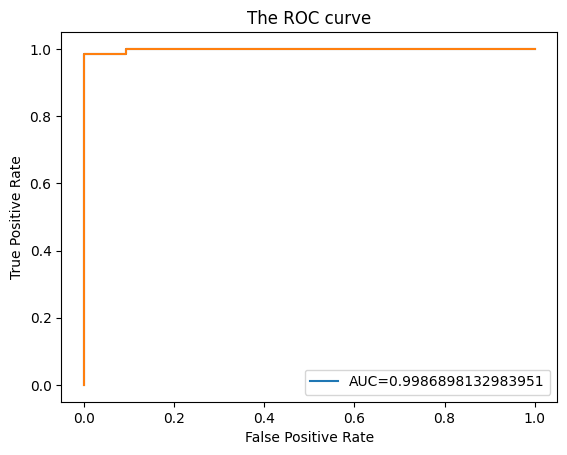

In [83]:
# Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC).
y_pred_proba = model.predict_proba(X_pca_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_pca_test, y_pred_proba)
# Calculate the AUC
auc = metrics.roc_auc_score(y_pca_test, y_pred_proba)
#create ROC curve and plot it
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("The ROC curve")
plt.legend(loc=4)
plt.show()

Based on the various predictive model performance evaluations above:
Accuracy: 0.974, which indicates that 97.4% of the model's predictions were correct.
Precision:0.972, which means that 97.2% predictions made by the model were correct.
Recall: 0.986, indicating that 98.6% of the actual positive inputs were correctly predicted by the model.
F1 Score: 0.979, which is a balanced measure considering both precision and recall.
AUC: 0.9986 means that the model has excellent discriminatory power and can accurately differentiate between Malignant and benign with a high degree of confidence. An AUC of 0.9986 implies that the model has a very high true positive rate (sensitivity) while maintaining a very low false positive rate, indicating that it rarely misclassifies positive and negative samples.

# Task 4:
Lift Chart: Implement the Lift Chart using the testing data to understand the model's performance in capturing Malignant cases compared to random selection.

In [84]:
# Predict probabilities for the malignant class (class 0)
y_probs_class_0 = model.predict_proba(X_pca_test)[:, 0]
display(y_test.groupby("diagnosis").size())

diagnosis
0    43
1    71
dtype: int64

There are 43 case of malignant while 71 case are Benign

array([2.51907764e-01, 1.00000000e+00, 9.99648949e-01, 6.78236119e-03,
       1.83217696e-03, 1.00000000e+00, 1.00000000e+00, 9.81617330e-01,
       2.35776818e-03, 4.62409767e-03, 2.37189446e-02, 9.99663590e-01,
       7.43355925e-03, 9.08087766e-01, 5.23137653e-04, 9.99988280e-01,
       1.09581478e-03, 2.67498983e-03, 2.11434205e-03, 9.99999997e-01,
       3.68287371e-01, 2.03010183e-02, 1.00000000e+00, 3.37600430e-03,
       1.55864539e-02, 4.40166882e-04, 9.94309868e-04, 2.54157014e-02,
       4.62612886e-03, 1.00000000e+00, 6.99031647e-03, 4.13639571e-04,
       1.21614703e-02, 3.91058609e-02, 1.82277169e-03, 3.11430069e-03,
       9.96616612e-01, 1.44225030e-03, 9.99999812e-01, 2.46493994e-01,
       5.58877895e-03, 9.98973260e-01, 1.50043627e-03, 5.74223721e-03,
       2.67331061e-03, 1.85738971e-02, 1.76260648e-03, 8.96995365e-02,
       2.69364571e-02, 8.84739051e-03, 9.99994188e-01, 9.99999999e-01,
       1.95240017e-01, 6.93863312e-03, 2.80473909e-03, 1.62919965e-02,
      

Text(0.5, 1.0, 'Sample Plot')

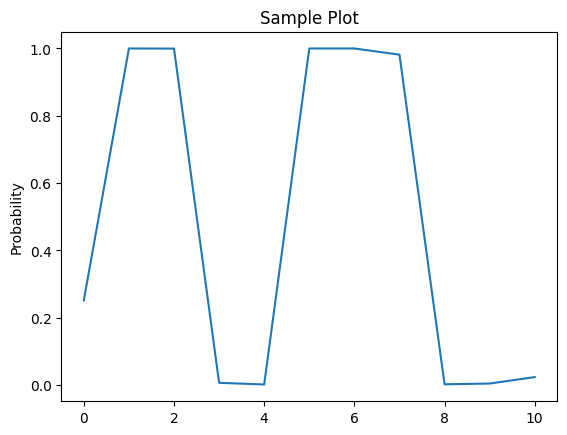

In [85]:
# Display the probabilities for the malignant class (class 0)
display(y_probs_class_0)

# Display the first 10 probabilities for the malignant class
y_probs_class_0_first_5 = y_probs_class_0[:11]
plt.plot(y_probs_class_0_first_5)
plt.ylabel('Probability')
plt.title('Sample Plot')

,Probability,TrueLabel
204,0.251908,1
70,1.000000,0
131,0.999649,0
431,0.006782,1
540,0.001832,1


265    1.000000
503    1.000000
82     1.000000
369    1.000000
393    1.000000
         ...   
76     0.000440
158    0.000414
271    0.000249
153    0.000189
140    0.000077
Name: Probability, Length: 114, dtype: float64

,Probability,TrueLabel
265,1.0,0
503,1.0,0
82,1.0,0
369,1.0,0
393,1.0,0


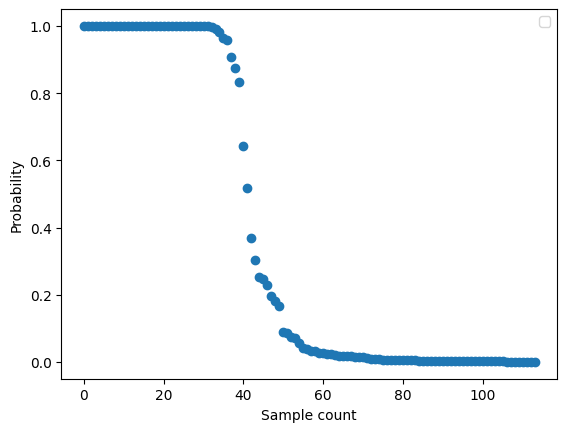

In [86]:
# Combine probabilities and true labels for sorting
lift_data = pd.DataFrame({'Probability': y_probs_class_0, 'TrueLabel': y_pca_test})
display(lift_data.head())

# Sort the data by probability in descending order
lift_data = lift_data.sort_values(by='Probability', ascending=False)
probs = lift_data["Probability"]
types = lift_data["TrueLabel"]
display(probs)
display(lift_data.head())

# Plot the probability
samples = lift_data.iloc[0]
plt.scatter(np.arange(len(probs)), probs)

plt.legend()
plt.ylabel("Probability")
plt.xlabel("Sample count")
plt.show()

In [87]:
# Calculate cumulative positive instances and cumulative response
lift_data['InvertedTrueLabel'] = 1 - lift_data['TrueLabel'] # Conver the label since the malignant class is label as"0"
lift_data['CumulativePositive'] = lift_data['InvertedTrueLabel'].cumsum()
lift_data['CumulativeResponse'] = lift_data['CumulativePositive'] / lift_data['InvertedTrueLabel'].sum()

total_positive_instances = lift_data['InvertedTrueLabel'].sum()

# Calculate random baseline cumulative response

lift_data['RandomBaseline'] = np.arange(1, len(y_test) + 1) * (total_positive_instances / len(y_test))

# Calculate the lift values and display the data frame
lift_data['Lift'] = lift_data['CumulativePositive'] / lift_data['RandomBaseline']
display(lift_data)

,Probability,TrueLabel,InvertedTrueLabel,CumulativePositive,CumulativeResponse,RandomBaseline,Lift
265,1.000000,0,1,1,0.023256,0.377193,2.651163
503,1.000000,0,1,2,0.046512,0.754386,2.651163
82,1.000000,0,1,3,0.069767,1.131579,2.651163
369,1.000000,0,1,4,0.093023,1.508772,2.651163
393,1.000000,0,1,5,0.116279,1.885965,2.651163
...,...,...,...,...,...,...,...
76,0.000440,1,0,43,1.000000,41.491228,1.036364
158,0.000414,1,0,43,1.000000,41.868421,1.027027
271,0.000249,1,0,43,1.000000,42.245614,1.017857
153,0.000189,1,0,43,1.000000,42.622807,1.008850


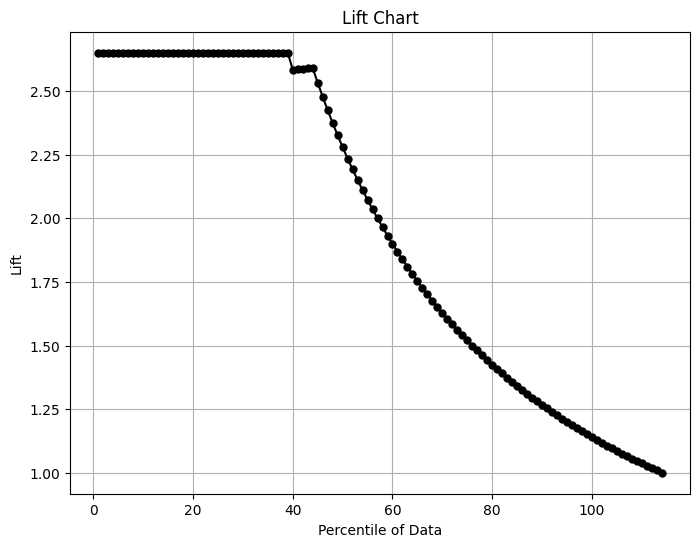

In [88]:
# Plot the lift chart
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(y_test) + 1), lift_data['Lift'], marker='o', linestyle='-', color='black',markersize=5)
plt.xlabel('Percentile of Data')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.grid()
plt.show()

A lift chart is a useful tool to assess the performance of a model, especially in binary classification problems with imbalanced classes. It helps us understand how well the model captures positive instances (in this case, Malignant cases) compared to random selection.

The lift value on the Y-axis represents how much better the model is at capturing Malignant cases compared to random selection.
A lift value of 1 means the model performs as well as random selection; value greater than 1 indicates it is better at capturing Malignant cases than random selection. Higher lift values are desirable; less than 1 suggests the model performs worse than random selection.

The X-axis represents the percentile of data. Data is divided into segments, and each segment contains a certain percentage of the total data.

Here, the lift curve is above the baseline, indicates that the model performs better than random selection at capturing Malignant cases. The biggest lift value is around 2.65, means that capturing around 2.65 times more Malignant cases compared to random selection. The model is performing significantly better than random chance at identifying Malignant cases.